Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has
several datasets. For this case study, we are using the Electronics dataset.

Please do the analysis based on steps( 1 to 8) as given below -
Steps -

1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

# 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
import pandas as pd

In [2]:
DF=pd.read_csv('ratings_Electronics.csv',header=None,names=['userID','productID','Rating','Timestamp'])
DF.head()

,userID,productID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
DF.shape

(7824482, 4)

In [4]:
DF.isnull().sum()  # There are no missing values 

userID       0
productID    0
Rating       0
Timestamp    0
dtype: int64

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userID       object
productID    object
Rating       float64
Timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [6]:
DF.userID=DF.userID.astype(str)
DF.productID=DF.productID.astype(str)
DF.Rating=DF.Rating.astype('float64')

In [7]:
DF.apply(lambda x: len(x.unique()))  # Cardinality of the column

userID       4201696
productID     476002
Rating             5
Timestamp       5489
dtype: int64

Ratings which have been used most by users 

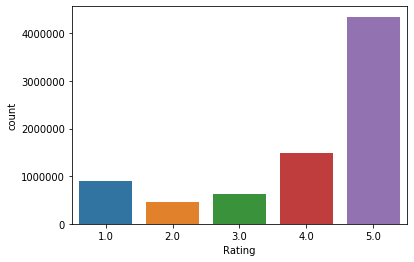

In [8]:
import seaborn as sns
sns.countplot(x='Rating',data=DF)

In [9]:
# From above plot, Rating=5 has been rated the most from users and Rating=2 has been rated very less 

UserID's who have rated the products most 

In [10]:
groupByUserID = DF.groupby('userID').count()
DF_userRatFreq = groupByUserID.sort_values('Rating',axis=0,ascending=False)
DF_userRatFreq.head(10)

,productID,Rating,Timestamp
userID,,,
A5JLAU2ARJ0BO,520,520,520
ADLVFFE4VBT8,501,501,501
A3OXHLG6DIBRW8,498,498,498
A6FIAB28IS79,431,431,431
A680RUE1FDO8B,406,406,406
A1ODOGXEYECQQ8,380,380,380
A36K2N527TXXJN,314,314,314
A2AY4YUOX2N1BQ,311,311,311
AWPODHOB4GFWL,308,308,308


In [11]:
# From above userID value count, userID=A5JLAU2ARJ0BO has been rated the most of the products 

Most Rated ProductID's

In [12]:
groupByproductID = DF.groupby('productID').count()
groupByproductID.sort_values('Rating',axis=0,ascending=False).head(10)

,userID,Rating,Timestamp
productID,,,
B0074BW614,18244,18244,18244
B00DR0PDNE,16454,16454,16454
B007WTAJTO,14172,14172,14172
B0019EHU8G,12285,12285,12285
B006GWO5WK,12226,12226,12226
B003ELYQGG,11617,11617,11617
B003ES5ZUU,10276,10276,10276
B007R5YDYA,9907,9907,9907
B00622AG6S,9823,9823,9823


In [13]:
# From above productID value count, productID=B0002L5R78 has been rated the most by users  

# 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [14]:
DF_100 = DF_userRatFreq[DF_userRatFreq['Rating'] >= 100]
DF_100

,productID,Rating,Timestamp
userID,,,
A5JLAU2ARJ0BO,520,520,520
ADLVFFE4VBT8,501,501,501
A3OXHLG6DIBRW8,498,498,498
A6FIAB28IS79,431,431,431
A680RUE1FDO8B,406,406,406
...,...,...,...
A1KKE6VX8VPWZK,100,100,100
A2RIL2NXHE00AQ,100,100,100
A3N0P5AAMP6XD2,100,100,100


In [15]:
DF_100.shape # Total 38 users have rated 50 times or more 

(289, 3)

In [16]:
DF_subset = pd.merge(DF_100,DF,how='inner',on='userID') 

In [17]:
DF_subset.drop(['productID_x','Rating_x','Timestamp_x'],inplace=True,axis=1)
DF_subset

,userID,productID_y,Rating_y,Timestamp_y
0,A5JLAU2ARJ0BO,1400532655,1.0,1291334400
1,A5JLAU2ARJ0BO,B00003006R,5.0,1052092800
2,A5JLAU2ARJ0BO,B00003G1RG,3.0,1104796800
3,A5JLAU2ARJ0BO,B00004S9AK,5.0,956880000
4,A5JLAU2ARJ0BO,B00004SB92,4.0,1034726400
...,...,...,...,...
44204,A2XCCN239AR1XK,B00IX2VGFA,5.0,1395964800
44205,A2XCCN239AR1XK,B00IZGWTVO,5.0,1400544000
44206,A2XCCN239AR1XK,B00JJWH98Q,5.0,1400544000
44207,A2XCCN239AR1XK,B00K91DB7Y,5.0,1403827200


# 3. Build Popularity Recommender model.

Recommendation on Subset dataset - 
First 20 recommended movies which have been rated 4 or 5 by users (These are the users who have rated more than 50 or more times)

In [18]:
DF_subset[DF_subset['Rating_y'] >= 4].groupby('productID_y').count().sort_values('Rating_y',axis=0,ascending=False).head(20)

,userID,Rating_y,Timestamp_y
productID_y,,,
B0088CJT4U,63,63,63
B003ES5ZUU,55,55,55
B004CLYEDC,49,49,49
B00829TIEK,49,49,49
B002R5AM7C,49,49,49
B000N99BBC,47,47,47
B004CLYEFK,45,45,45
B00829THK0,42,42,42
B008DWCRQW,38,38,38


In [19]:
# productID = B003ES5ZUU has been rated 4 or 5 by most times by 17 users (users who have rated movies more than 200 times)

Recommendation on Full dataset - 
First 20 recommended movies which have been rated 4 or 5 by most users 

In [20]:
DF[DF['Rating'] >= 4].groupby('productID').count().sort_values('Rating',axis=0,ascending=False).head(20)

,userID,Rating,Timestamp
productID,,,
B0074BW614,16098,16098,16098
B007WTAJTO,12244,12244,12244
B0019EHU8G,11640,11640,11640
B00DR0PDNE,11604,11604,11604
B006GWO5WK,10048,10048,10048
B003ELYQGG,9868,9868,9868
B003ES5ZUU,9653,9653,9653
B007R5YDYA,9257,9257,9257
B00622AG6S,8502,8502,8502


In [21]:
# But from complete dataset, we see productID = B0074BW614 has been rated 4 or 5 by 16098 users

# 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [22]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

In [23]:
data = Dataset.load_from_df(DF_subset[['userID', 'productID_y', 'Rating_y']], reader)

In [24]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=123)

In [25]:
type(trainset)

surprise.trainset.Trainset

# 5. Build Collaborative Filtering model.

In [26]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [27]:
algo = KNNWithMeans(k=51, sim_options={'name': 'pearson', 'user_based': False})  # Item Based Collaborative Filtering Model
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


# 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [28]:
test_pred = algo.test(testset)

In [29]:
accuracy.rmse(test_pred)

RMSE: 1.0855


1.085483849997758

# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [30]:
testset_new = trainset.build_anti_testset()

In [31]:
len(testset_new)

5066436

In [32]:
testset_new[0:5]

[('A11D1KHM7DVOQK', 'B002QQ3VK2', 4.27971304853616),
 ('A11D1KHM7DVOQK', 'B000V1MLBE', 4.27971304853616),
 ('A11D1KHM7DVOQK', 'B0034CL2ZI', 4.27971304853616),
 ('A11D1KHM7DVOQK', 'B0041Q38NU', 4.27971304853616),
 ('A11D1KHM7DVOQK', 'B00L3YHF6O', 4.27971304853616)]

In [33]:
predictions = algo.test(testset_new[0:10000])

In [34]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [35]:
predictions_df.columns = ["userID","productID","Rating"]
predictions_df.sort_values(by = ["userID", "Rating"],ascending=False,inplace=True)

In [36]:
predictions_df.head(5)

,userID,productID,Rating
0,A11D1KHM7DVOQK,B002QQ3VK2,5.0
4,A11D1KHM7DVOQK,B00L3YHF6O,5.0
5,A11D1KHM7DVOQK,B00267S7XW,5.0
13,A11D1KHM7DVOQK,B009UNGYHG,5.0
20,A11D1KHM7DVOQK,B0007TSYCK,5.0


In [37]:
top_5_recos = predictions_df.groupby("userID").head(5).reset_index(drop=True)

In [38]:
top_5_recos

,userID,productID,Rating
0,A11D1KHM7DVOQK,B002QQ3VK2,5.0
1,A11D1KHM7DVOQK,B00L3YHF6O,5.0
2,A11D1KHM7DVOQK,B00267S7XW,5.0
3,A11D1KHM7DVOQK,B009UNGYHG,5.0
4,A11D1KHM7DVOQK,B0007TSYCK,5.0


# 8. Summarise your insights.

In [39]:
# This is item based collaborative filtering which means recommendations are recommended based on same user who rated 51 similar products  

# For user=A11D1KHM7DVOQK, top 5 movies recommended are below 
# ProductID = B002QQ3VK2, B00L3YHF6O, B00267S7XW, B009UNGYHG and B0007TSYCK